# Business Understanding

## Project Domain

Alpukat Hass adalah jenis alpukat populer yang terkenal dengan ciri khasnya yang berkerikil, kulitnya berwarna hijau tua hingga hitam, serta dagingnya yang lembut dan bermentega saat matang. Buahnya berukuran besar, dan merupakan varietas komersial paling umum di dunia.

Kumpulan data sintetis yang mensimulasikan pengukuran yang dirancang untuk tugas klasifikasi dalam memprediksi tahap kematangan alpukat menggunakan karakteristik fisik.

## Problem Statements

Dalam rantai distribusi produk pertanian, khususnya buah alpukat, penentuan tingkat kematangan merupakan hal krusial yang berdampak langsung pada kualitas, umur simpan, dan kepuasan pelanggan. Penilaian kematangan secara manual oleh pekerja sering kali tidak konsisten dan memerlukan waktu. Oleh karena itu, diperlukan sebuah sistem klasifikasi otomatis yang dapat secara akurat memprediksi tingkat kematangan alpukat berdasarkan fitur visual dan fisik yang terekstrak dari dataset.

Tujuan dari proyek ini adalah membangun model machine learning yang mampu mengklasifikasikan alpukat ke dalam tiga kategori kematangan utama — unripe, ripe, dan overripe — secara efisien dan andal, guna mendukung otomasi dalam proses quality control dan distribusi produk pertanian.*

## Goals

Membangun model machine learning yang mampu mengklasifikasikan tingkat kematangan alpukat ke dalam tiga kategori: Unripe, Ripe, dan Overripe berdasarkan fitur yang tersedia.

Meningkatkan efisiensi dan akurasi dalam proses penilaian kematangan alpukat, yang biasanya dilakukan secara manual dan subjektif.

Mengurangi kesalahan distribusi dalam rantai pasok buah alpukat dengan menyediakan informasi prediksi kematangan yang akurat.

Mendukung otomasi dalam proses quality control untuk industri pertanian dan retail dengan menerapkan klasifikasi otomatis berbasis data.

Menghasilkan model yang ringan dan kompatibel untuk digunakan pada perangkat edge seperti smartphone atau sistem embedded (misalnya melalui konversi ke TFLite).

## Solustion Statements

Untuk mengatasi permasalahan dalam klasifikasi tingkat kematangan alpukat secara manual yang tidak efisien dan rentan terhadap kesalahan manusia, solusi yang diusulkan adalah mengembangkan sistem klasifikasi berbasis machine learning. Sistem ini akan dilatih menggunakan dataset yang berisi fitur visual dan numerik dari buah alpukat, seperti ukuran, warna, dan berat, untuk memprediksi label kematangan (Unripe, Ripe, Overripe). Model ini akan dibangun menggunakan algoritma deep learning (neural network),

# Data Understanding

## Import Data dari Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dickyadryanmaulana","key":"a56cdaa2bc701613e488033579619b26"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d amldvvs/avocado-ripeness-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset
License(s): apache-2.0
  0% 0.00/3.64k [00:00<?, ?B/s]
100% 3.64k/3.64k [00:00<00:00, 6.72MB/s]


In [4]:
!mkdir avocado-ripeness-classification-dataset
!unzip avocado-ripeness-classification-dataset.zip -d avocado-ripeness-classification-dataset
!ls avocado-ripeness-classification-dataset

Archive:  avocado-ripeness-classification-dataset.zip
  inflating: avocado-ripeness-classification-dataset/avocado_ripeness_dataset.csv  
avocado_ripeness_dataset.csv


## Import Library yang dibutuhkan

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [41]:
df = pd.read_csv('avocado-ripeness-classification-dataset/avocado_ripeness_dataset.csv')

In [42]:
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


<ipython-input-158-7970096d8c4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='firmness', y='ripeness', inner='stick', palette='Dark2')


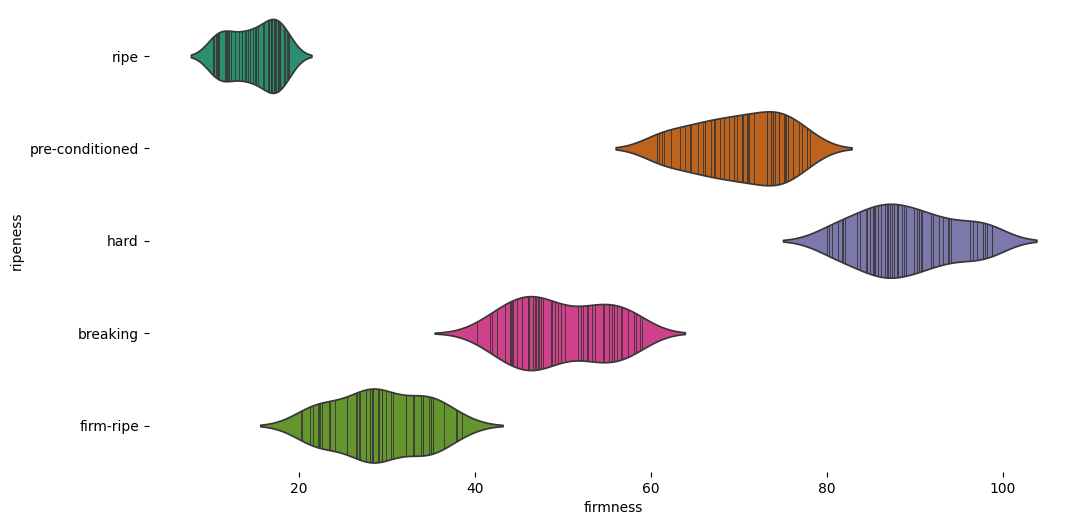

In [158]:
# @title ripeness vs firmness

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ripeness'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='firmness', y='ripeness', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

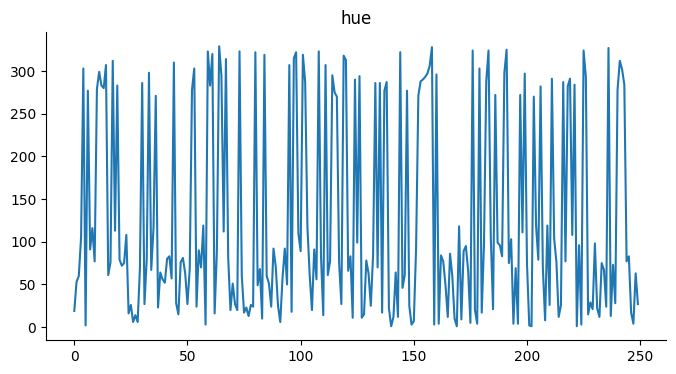

In [157]:
# @title hue

from matplotlib import pyplot as plt
df['hue'].plot(kind='line', figsize=(8, 4), title='hue')
plt.gca().spines[['top', 'right']].set_visible(False)

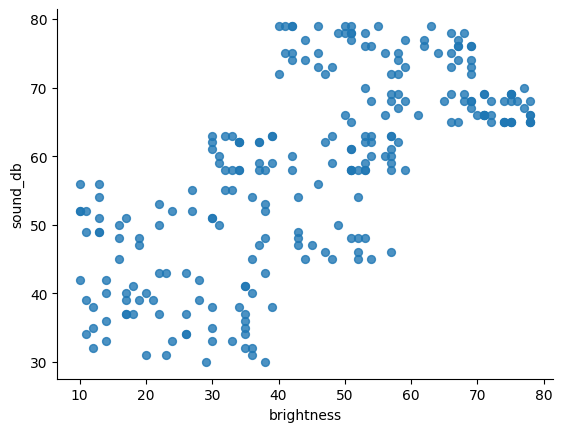

In [156]:
# @title brightness vs sound_db

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='brightness', y='sound_db', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

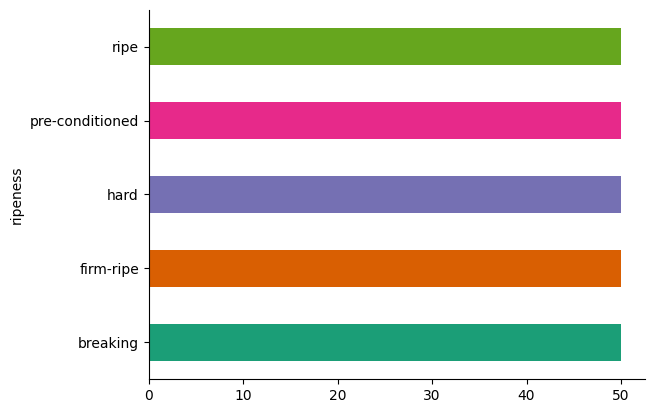

In [155]:
# @title ripeness

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ripeness').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

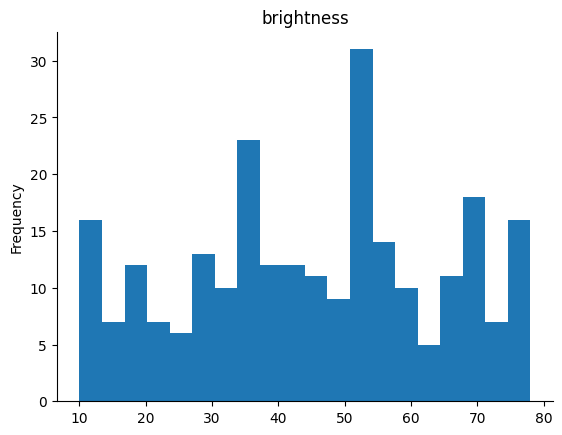

In [154]:
# @title brightness

from matplotlib import pyplot as plt
df['brightness'].plot(kind='hist', bins=20, title='brightness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


# Data Preparation

In [231]:
# pisahkan fitur dan target
X = df.drop(columns=['ripeness','color_category','firmness','hue'])
y = df['ripeness']

In [232]:
# Encode label target
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

In [233]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [234]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [235]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Modeling

In [236]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [237]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [238]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,629 (10.27 KB)

 Trainable params: 2,629 (10.27 KB)

 Non-trainable params: 0 (0.00 B)

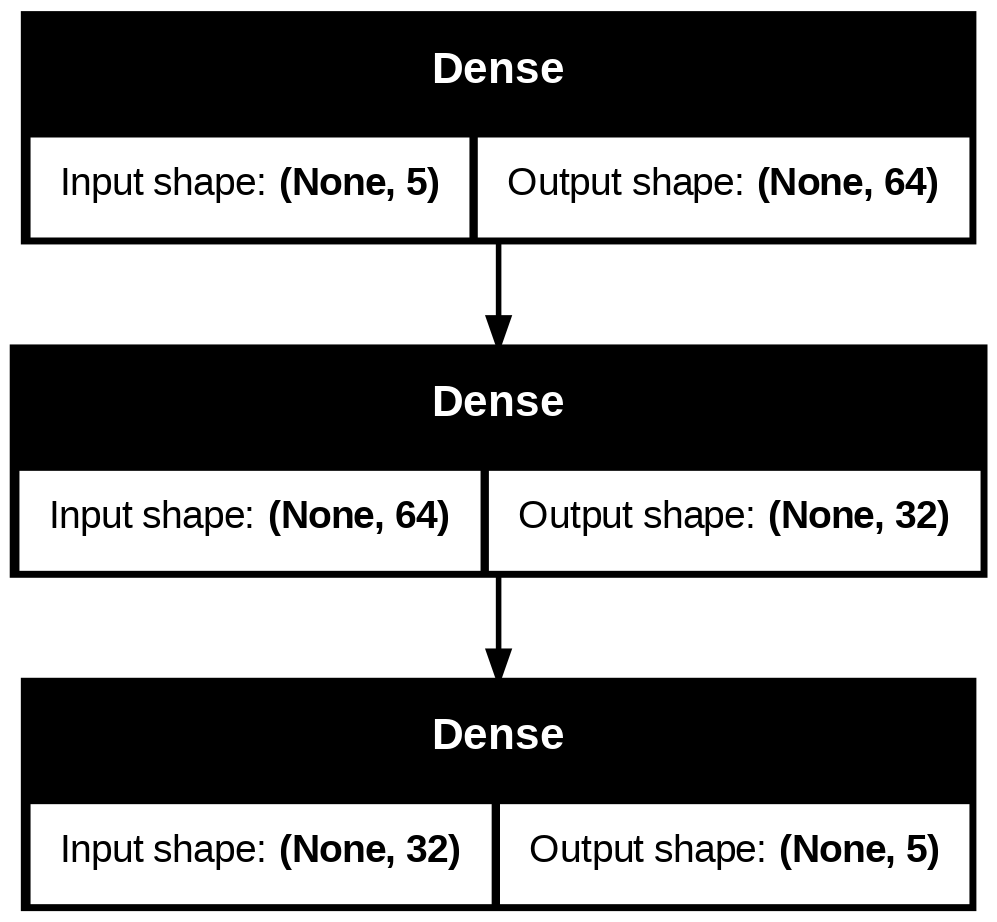

In [239]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [240]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test)
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2712 - loss: 1.6084 - val_accuracy: 0.4000 - val_loss: 1.5224
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4168 - loss: 1.5018 - val_accuracy: 0.4600 - val_loss: 1.4421
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4364 - loss: 1.4138 - val_accuracy: 0.5600 - val_loss: 1.3712
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5326 - loss: 1.3411 - val_accuracy: 0.6000 - val_loss: 1.2865
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5489 - loss: 1.2677 - val_accuracy: 0.7400 - val_loss: 1.1937
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7083 - loss: 1.1543 - val_accuracy: 0.7200 - val_loss: 1.1119
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6783 - loss: 1.0858 - val_accuracy: 0.8000 - val_loss: 1.0232
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7836 - loss: 0.9897 - val_accuracy: 0.7800 - val_los

# Evaluation

In [242]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1119
Akurasi Model: 1.0000
Loss Model: 0.1099


In [243]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

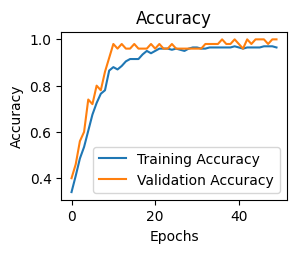

In [244]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

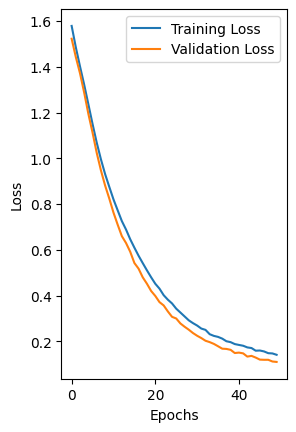

In [245]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


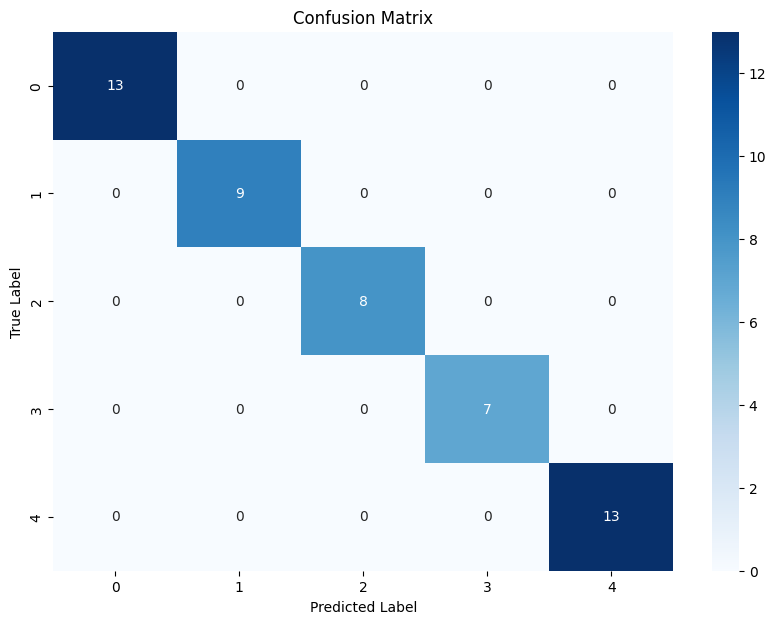

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [246]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [250]:
sample_input = np.array([[61, 65, 68, 201, 247]])
sample_input_df = pd.DataFrame(sample_input)

In [251]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [252]:
prediction = model.predict(sample_input)
predicted_class = np.argmax(prediction)
predicted_label = label_encoder.inverse_transform([predicted_class])

print(f"Prediksi tingkat kematangan alpukat: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediksi tingkat kematangan alpukat: ripe


## Save Model

In [152]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('avocado.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpjicht12l'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  132474179596752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132474179596368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132474179592144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132474179590416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132474179592528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132474179597904: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [153]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']